In [2]:
%matplotlib inline
from matplotlib import style
from matplotlib import figure
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import pandas as pd

import datetime as dt

In [3]:
# Reflect Tables into SQLAlchemy ORM

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
Max: 85.0 Min: 54.0 Avg: 71.66378066378067
[(62.0, 69.57142857142857, 74.0)]
[(70.0, 78.29032258064517, 85.0)]


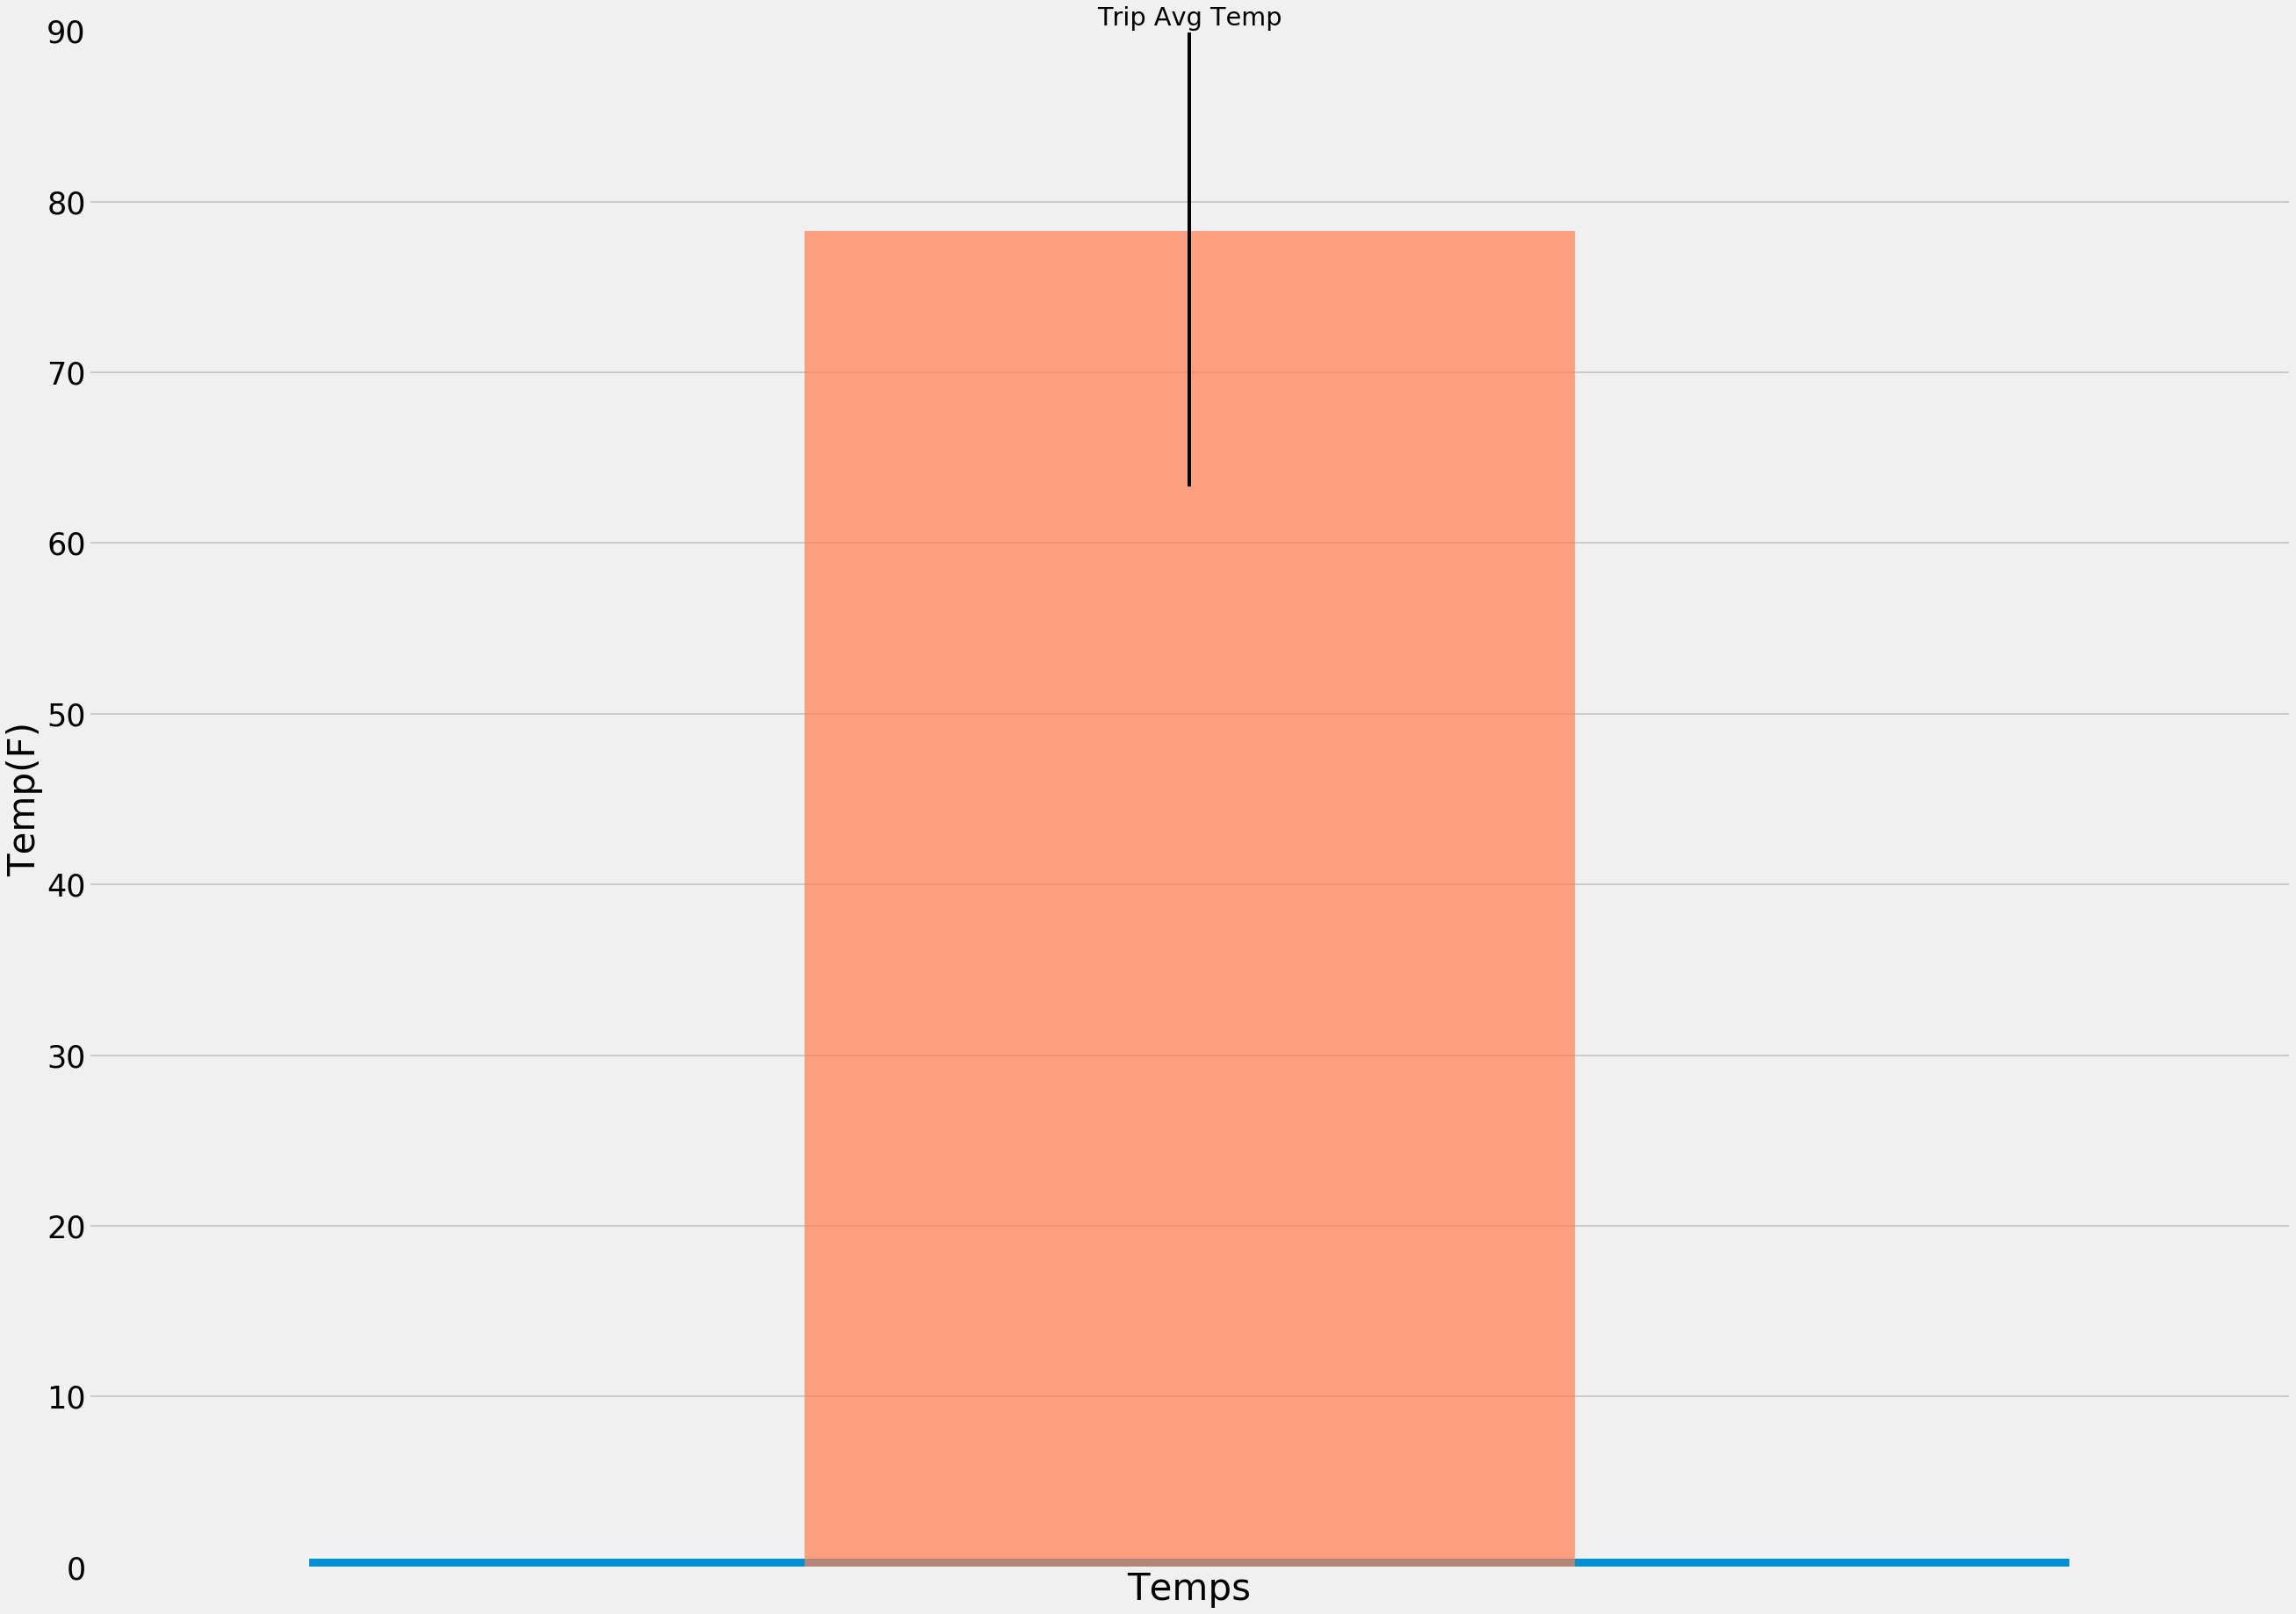

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print (c['name'], c['type'])

engine.execute("Select * from measurement limit 5").fetchall()

# Exploratory Climate Analysis

# Design a query to retrieve the last 12 months of precipitation data and plot the results
t_m = [Measurement.date, Measurement.prcp]
# Calculate the date 1 year ago from the last data point in the database
twelve_mo = session.query(*t_m).\
order_by(Measurement.date.desc()).all()



# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
mo12 = session.query(*t_m).\
filter(Measurement.date > "2016-08-22").all()


# Save the query results as a Pandas DataFrame and set the index to the date column
dateprecp1 = pd.DataFrame(mo12)
dateprecp1 = dateprecp1.sort_values('date', ascending = False)

dateprecp = dateprecp1.set_index('date')
dateprecp.head()

# Sort the dataframe by date
dateprecp = dateprecp.sort_index(ascending=False)
# Use Pandas Plotting with Matplotlib to plot the data



x = dateprecp1['date']
y = dateprecp1['prcp']
plt.rcParams['figure.figsize'] = (40,30)
plt.rcParams.update({'font.size': 35})
plt.bar(x,y,linewidth = 100)
plt.ylim(0,7)
plt.xlim(-5,370)
plt.ylabel('Precipitation(Inches)')
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.xticks(np.arange(-5, 370, step=35))
plt.grid(linewidth = 2)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False);





# Use Pandas to calcualte the summary statistics for the precipitation data
dateprecp.describe()

# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement.id, Measurement.station).\
group_by(Measurement.station).count()
stations

# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement.id, Measurement.station)
stdf = pd.DataFrame(stations)
stdf = stdf.set_index('id')
stdf = stdf['station'].value_counts()
stdf

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
topstation = engine.execute("select * from measurement where station == 'USC00519281'").fetchall()
topdf = pd.DataFrame(topstation)
topdf= topdf.dropna()
topdf.head()

tmax = topdf[4].max()
tmin = topdf[4].min()
tavg = topdf[4].mean()
print("Max:", tmax, "Min:", tmin, "Avg:", tavg)





s_m = [Measurement.date, Measurement.station, Measurement.tobs]
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stationmo12 = session.query(*s_m).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date > "2016-08-22").\
order_by(Measurement.date).all()
stmodf = pd.DataFrame(stationmo12)
stmodf = stmodf.dropna()
# stmodf = stmodf.groupby('tobs')
# mox = stmodf['tobs']
# moy = stmodf['tobs']
# plt.hist(mox,moy)
# stmodf1 = stmodf.count()
# stmodf
x=stmodf['tobs']
plt.hist(x, bins = 15)
plt.ylabel('Frequency')
plt.xlabel('Temps')
plt.rcParams['figure.figsize'] = (40,30)
plt.rcParams.update({'font.size': 35});

# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2017-08-15', '2017-08-22'))

def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
calc = calc_temps('2017-08-15', '2017-08-22')
calc

# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
N = 1
avg = (78.3)
swing = (15)
width = .35
plt.rcParams['figure.figsize'] = (7,15)
plt.rcParams.update({'font.size': 20})
plt.xlim(.5,1.5)
plt.yticks(np.arange(0,100, step = 10))
plt.xticks(np.arange(0,1, step = 1))
x= np.arange(1,2, step = 1)
plt.ylabel('Temp(F)')
plt.title('Trip Avg Temp')
plt.bar(x, avg, width, yerr= swing, color = 'coral', alpha = 0.7);